In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Any dataset that has columns with values as 'Yes' or 'No', strings' values cannot be used.
# However, we can convert them to numerical values as binary.

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_threeBtrain = df_train[num_vars]
df_threeBtest = df_test[num_vars]
df_threeBtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000


In [ ]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_threeBtrain[num_vars] = scaler.fit_transform(df_threeBtrain[num_vars])
df_threeBtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239394


In [ ]:
dataset_train = df_threeBtrain.values[:,:]
print(dataset_train[:20,:])

[[0.12419939 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.08181818]
 [0.08382066 0.2        0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.0969697 ]
 [0.12280702 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.07272727]
 [0.55861877 0.4        0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.23939394]
 [0.14842662 0.4        0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.23030303]
 [0.13951546 0.4        0.         0.33333333 1.         0.
  0.         0.         0.         0.33333333 1.         0.24545455]
 [0.55444166 0.6        0.5        0.33333333 1.         1.
  0.         0.         0.         0.

In [ ]:
X_train = df_threeBtrain.values[:,0:11]
Y_train = df_threeBtrain.values[:,11]
len(X_train), len(Y_train)

(436, 436)

In [ ]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[0.12419939 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]]
Y = [0.         0.08181818 0.0969697  0.07272727 0.23939394]


In [ ]:
# Convert to 2D array (381x11)
m = len(X_train)
X_1 = X_train.reshape(m,11)
print("X_1 =", X_1[:5,:])

X_1 = [[0.12419939 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]]


In [ ]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [ ]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
theta = np.zeros((12,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m
lambda_value: Regularization parameter. 
theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta, lambda_value):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    regularization = lambda_value * np.sum(np.square(theta))
    J = (1 / (2 * m)) * (np.sum(sqrErrors) + regularization)
    return J

In [ ]:
lambda_value = 10
cost = compute_loss(X_train, Y_train, theta, lambda_value)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 20.934727519081726


In [ ]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.
lambda_value: Regularization parameter. 

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations, lambda_value):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        # Use np.multiply() to multiple scalar with the array, theta. 
        sum_delta = (alpha / m) * X.transpose().dot(errors) + np.multiply(theta,((lambda_value * alpha) / m)); 
        theta = theta - sum_delta; #theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta, lambda_value)
    return theta, loss_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
lambda_value = 10
iterations = 1500
alpha = 0.003

In [ ]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations, lambda_value)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [0.07250306 0.0501732  0.05031337 0.06423585 0.06502243 0.0726465
 0.03808205 0.03585613 0.02009795 0.07870064 0.0546766  0.05897476]
loss_history = [0.04741442 0.04682257 0.04623973 ... 0.00676845 0.00676782 0.00676718]


In [ ]:
df_threeBtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,4000,3,1,2,1,0,0,0,0,1,0,4585000
113,9620,3,1,1,1,0,1,0,0,2,1,6083000
325,3460,4,1,2,1,0,0,0,1,0,0,4007500
66,13200,2,1,1,1,0,1,1,0,1,0,6930000
479,3660,4,1,2,0,0,0,0,0,0,0,2940000


In [ ]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_threeBtest[num_vars] = scaler.fit_transform(df_threeBtest[num_vars])
df_threeBtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,0.203463,0.50,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.270000
113,0.690043,0.50,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.412667
325,0.156710,0.75,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.215000
66,1.000000,0.25,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.333333,0.0,0.493333
479,0.174026,0.75,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.113333


In [ ]:
dataset_test = df_threeBtest.values[:,:]
print(dataset_test[:20,:])

[[0.2034632  0.5        0.         0.33333333 1.         0.
  0.         0.         0.         0.33333333 0.         0.27      ]
 [0.69004329 0.5        0.         0.         1.         0.
  1.         0.         0.         0.66666667 1.         0.41266667]
 [0.15670996 0.75       0.         0.33333333 1.         0.
  0.         0.         1.         0.         0.         0.215     ]
 [1.         0.25       0.         0.         1.         0.
  1.         1.         0.         0.33333333 0.         0.49333333]
 [0.17402597 0.75       0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.11333333]
 [0.40692641 0.5        0.33333333 0.66666667 1.         1.
  0.         0.         1.         0.         0.         0.42333333]
 [0.19047619 0.5        0.         0.         1.         0.
  0.         0.         0.         0.66666667 0.         0.17      ]
 [0.15844156 0.5        0.         0.33333333 0.         0.
  0.         0.         0.         0.

In [ ]:
X_test = df_threeBtest.values[:,0:11]
Y_test = df_threeBtest.values[:,11]
len(X_test), len(Y_test)

(109, 109)

In [ ]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[0.2034632  0.5        0.         0.33333333 1.         0.
  0.         0.         0.         0.33333333 0.        ]
 [0.69004329 0.5        0.         0.         1.         0.
  1.         0.         0.         0.66666667 1.        ]
 [0.15670996 0.75       0.         0.33333333 1.         0.
  0.         0.         1.         0.         0.        ]
 [1.         0.25       0.         0.         1.         0.
  1.         1.         0.         0.33333333 0.        ]
 [0.17402597 0.75       0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.        ]]
Y = [0.27       0.41266667 0.215      0.49333333 0.11333333]


In [ ]:
# Convert to 2D array (164x11)
m = len(X_test)
X_1 = X_test.reshape(m,11)
print("X_1 =", X_1[:5,:])

X_1 = [[0.2034632  0.5        0.         0.33333333 1.         0.
  0.         0.         0.         0.33333333 0.        ]
 [0.69004329 0.5        0.         0.         1.         0.
  1.         0.         0.         0.66666667 1.        ]
 [0.15670996 0.75       0.         0.33333333 1.         0.
  0.         0.         1.         0.         0.        ]
 [1.         0.25       0.         0.         1.         0.
  1.         1.         0.         0.33333333 0.        ]
 [0.17402597 0.75       0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.        ]]


In [ ]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 109)

In [ ]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[1.        , 0.2034632 , 0.5       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        ],
       [1.        , 0.69004329, 0.5       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.15670996, 0.75      , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [1.        , 1.        , 0.25      , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.33333333, 0.        ],
       [1.        , 0.17402597, 0.75      , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
theta_test = np.zeros((12,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss_noreg(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
cost_test = compute_loss_noreg(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 5.79399238888889


In [ ]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent_noreg(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss_noreg(X, Y, theta)
    return theta, loss_history

In [ ]:
theta_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [ ]:
theta_test, loss_history_test = gradient_descent_noreg(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [0.08068021 0.07227611 0.06077027 0.06066932 0.07529487 0.08690136
 0.0128184  0.02678734 0.00876003 0.0921445  0.06943986 0.01541427]
loss_history = [0.05245705 0.05176907 0.05109178 ... 0.00566679 0.00566585 0.0056649 ]


Text(0.5, 1.0, 'Convergence of gradient descent')

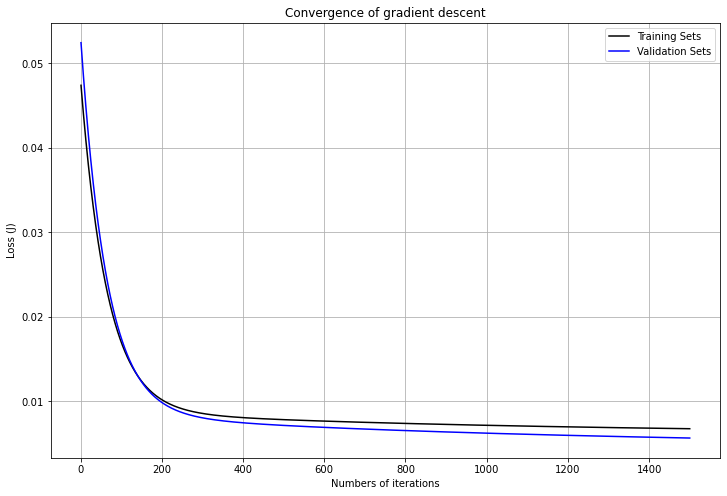

In [ ]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")